<br>

<h2 style="text-align: center; font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: underline; text-transform: none; letter-spacing: 2px; color: blue; background-color: #ffffff;">PERSONALIZED ROUTES: Geographical Network Analysis</h2>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">NOTEBOOK for SECTION 3.2.1 </h5>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">AUTHOR: Luis Rodríguez Ballabriga</h5>


<br>

---

<br>




<p id="toc"></p>

<br><br>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: blue; background-color: #ffffff;">TABLE OF CONTENTS</h1>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#imports">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#dimensionality">1&nbsp;&nbsp;&nbsp;&nbsp;DIMENSIONALITY</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#processing">2&nbsp;&nbsp;&nbsp;&nbsp;PROCESSING</a></h3>

---

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: blue;" id="imports">0&nbsp;&nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

---

In [1]:
#ENV SET UP
import warnings
warnings.filterwarnings("ignore")

from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import geopandas as gpd

print(f'– PANDAS VERSION: {pd.__version__}')
print(f'– GEOPANDAS VERSION: {gpd.__version__}')

pd.set_option('display.max_columns', None)

– PANDAS VERSION: 1.3.3
– GEOPANDAS VERSION: 0.10.2


<br>

<a id="dimensionality"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: blue; background-color: #ffffff;" id="dimensionality">1&nbsp;&nbsp;DIMENSIONALITY&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

---

We start reading the files and creating a dataframe for each of the cities.

In [2]:
retail_bcn = pd.read_csv('Data/Datasets/retail_barcelona.csv', sep = ',', encoding = 'utf-8')
retail_mad = pd.read_csv('Data/Datasets/retail_madrid.csv', sep = ',', encoding = 'utf-8')
retail_lnd = pd.read_csv('Data/Datasets/retail_london.csv', sep = ',', encoding = 'utf-8')
retail_nyc = pd.read_csv('Data/Datasets/retail_nyc.csv', sep = ',', encoding = 'utf-8')

Let's take a look at each of them.

In [3]:
retail_bcn.head(5)

,X,Y,id,foreign_id,layer_id,title,area,city,number,street,carrer,carrers_gencat,x,y,startdate,enddate,rc,local,orden,comments,description_cat,description_cas,description_eng,description_xin,description_rus,person_responsible,last_visit,next_visit,visit_period,lon,lat,associat,url,phone,fax,email,photo,pae,keyword,description_fr,description_dut,description_jp,BCN_Parcel∑les_ED50_SHP_SOLAR,BCN_Parcel∑les_ED50_SHP_C_Illa,BCN_Parcel∑les_ED50_SHP_C_Parcel,BCN_Parcel∑les_ED50_SHP_District,BCN_Parcel∑les_ED50_SHP_NDistric,BCN_Parcel∑les_ED50_SHP_CBarri,BCN_Parcel∑les_ED50_SHP_NBarri,BCN_Parcel∑les_ED50_SHP_C_AEB,BCN_Parcel∑les_ED50_SHP_CSecCens,BCN_Parcel∑les_ED50_SHP_Perimetr,BCN_Parcel∑les_ED50_SHP_Area,BCN_Parcel∑les_ED50_SHP_Coord_X,BCN_Parcel∑les_ED50_SHP_Coord_Y
0,429313,4581410.0,83969.0,NaN,12.0,Garces Taller,Catalunya,Barcelona,78,CL ROCAFORT,NaN,NaN,429313.0,4581410.0,28/10/2011,NaN,9314916DF2891C,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.535.128.874.303,41.379.258.910.135,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116943.0,60640.0,16.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,177.390244,1192.865926,429340.906278,4.581433e+06
1,430057,4581961.0,86258.0,NaN,146.0,Ritsch,Catalunya,Barcelona,17,CL MUNTANER,NaN,NaN,430057.0,4581961.0,30/11/2011,NaN,0019110DF3801G,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,31/03/2014,31/03/2015,12.0,21.623.459.446.567,41.384.286.638.153,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120695.0,60090.0,10.0,2.0,Eixample,10.0,Sant Antoni,53.0,164.0,113.343556,492.760053,430044.665729,4.581942e+06
2,429327,4581395.0,83964.0,NaN,40.0,Lunch & Catering Bar,Catalunya,Barcelona,72,CL ROCAFORT,NaN,NaN,429327.0,4581395.0,28/10/2011,NaN,9314914DF2891C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.536.820.480.632,41.379.125.040.671,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116941.0,60640.0,14.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,76.014905,297.957919,429336.223717,4.581398e+06
3,429306,4581417.0,83970.0,NaN,8.0,Galaxia Complements Dona,Catalunya,Barcelona,80,CL ROCAFORT,NaN,NaN,429306.0,4581417.0,28/10/2011,NaN,9314917DF2891C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.534.283.652.077,41.379.321.341.441,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116944.0,60640.0,17.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,74.977091,255.973664,429317.988114,4.581424e+06
4,428345,4580326.0,74866.0,NaN,40.0,Celler de l`Abi,Catalunya,Barcelona,220,GV CORTS CATALANES,NaN,NaN,428345.0,4580326.0,6/7/2011,NaN,8302401DF2880C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,25/03/2014,25/03/2015,12.0,21.420.658.677.801,41.369.410.048.724,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137066.0,21883.0,1.0,3.0,Sants-MontjuÔc,14.0,la Font de la Guatlla,65.0,41.0,79.034451,398.758552,428358.069749,4.580321e+06


In [4]:
retail_mad.head(5)

,X,Y,Id,Name,LayerID,LayerTextID,City,Street,Number,Order,Startdate,Enddate,PAE
0,-3.607043,40.403984,397073,Erimar Deportes,106,ardep,Madrid,CL SAN CIPRIANO,22,1,2014-04-21,None,NaN
1,-3.601888,40.403809,397107,Heidi y Gian,55,locu,Madrid,CL SAN CIPRIANO,68,2,2014-04-21,None,NaN
2,-3.669858,40.441708,327997,Ifi Rapid,39,info,Madrid,CL CORAZON DE MARIA,9,1,2013-12-08,None,NaN
3,-3.698350,40.411763,262504,Ganiveteria,35,arranj,Madrid,CL DUQUE DE FERNAN NUÑEZ,4,2,2013-05-28,None,NaN
4,-3.668000,40.399017,324198,Zapatería A.Varela,13,saba,Madrid,AV PEÑA PRIETA,10,1,2013-11-29,None,NaN


In [5]:
retail_lnd.head(5)

,X,Y,Id,Name,LayerID,LayerTextID,City,Street,Number,Order,Startdate,Enddate,PAE
0,-0.181054,51.481654,1084148,Co-op Food,31,ccom,London,King's Rd,471,1,2020-04-11,None,NaN
1,-0.181520,51.481823,1084149,Sparkles Dry Cleaning & Alterations,22,tint,London,King's Rd,512,1,2020-04-11,None,NaN
2,-0.181344,51.481853,1084151,Eve Leibe Gallery,148,arte,London,King's Rd,508,1,2020-04-11,None,NaN
3,-0.181213,51.481885,1084152,William Hill,108,ocio,London,King's Rd,506,1,2020-04-11,None,NaN
4,-0.181099,51.481923,1084153,Scissors & Guys,4,pelu,London,King's Rd,504,1,2020-04-11,None,NaN


In [6]:
retail_nyc.head(5)

,X,Y,Id,Name,LayerID,LayerTextID,City,Street,Number,Order,Startdate,Enddate,PAE
0,-73.984777,40.671290,953911,Colombia in Park Slope,40,bar,New york,5th Ave,376,2,2019-07-15,None,NaN
1,-73.984822,40.671273,953910,Botanica Universal,27,flor,New york,5th Ave,376,1,2019-07-15,None,NaN
2,-73.984724,40.671345,953913,Zuzu's Petals,27,flor,New york,5th Ave,374,2,2019-07-15,None,NaN
3,-73.984743,40.671310,953912,Baya Bar,40,bar,New york,5th Ave,374,1,2019-07-15,None,NaN
4,-73.985378,40.670553,953898,KC Tasty Deli & Grill,151,rapi,New york,5th Ave,402,1,2019-07-15,None,NaN


Checking the shapes:

In [7]:
print("Retail Barcelona:", retail_bcn.shape)
print("Retail Madrid:", retail_mad.shape)
print("Retail London:", retail_lnd.shape)
print("Retail New York:", retail_nyc.shape)

Retail Barcelona: (49733, 55)
Retail Madrid: (62190, 13)
Retail London: (50822, 13)
Retail New York: (30192, 13)


As we can see, the ones in Spain (Barcelona and Madrid) seem to be the most complete ones (given that London and New York are larger cities, but have fewer records). The one in Barcelona is also the one with the highest number of features.

We can see how all dataframes share some columns, such as the **X**, **Y** coordinates corresponding to the altitude and latitude and also the so-called **layer_id**. This is a categorical variable that refers to the type of business to which it corresponds (for example: supermarket, hairdresser, bookshop, etc). This variable takes numeric values, so we need a dictionary to translate this number into the corresponding classification.

For it we have the file *layers.xlsx*, where we select the columns we are interested in.

In [8]:
layers_aux = pd.read_excel('Data/Datasets/layers.xls')

layers_dict = layers_aux[['sub_catego', 'title_cat']]
layers_dict_aux = layers_dict.copy()

Let's see some of the categories.

In [9]:
layers_dict

,sub_catego,title_cat
0,1,- Otro / Desconocida
1,2,restaurant
2,3,banca i serveis financers
3,4,perruqueria
4,5,estanc
...,...,...
149,568,fabricació d'electrodomèstics
150,569,indústria del transport
151,570,indústria fusta i/o paper
152,571,centres comercials


In [10]:
layers_dict["title_cat"].unique()

array(['- Otro / Desconocida', 'restaurant', 'banca i serveis financers',
       'perruqueria', 'estanc', 'papereria, llibreria i copisteria',
       'llar, decoració i mobiliari', 'roba i complements',
       'joieria i rellotgeria ', 'gestió immobiliària', 'concessionari',
       'taller mecànic', 'sabateria', 'telefonia ', 'dolços i pastissos',
       'farmàcia i ortopèdia', 'varietats', 'òptica',
       'serveis tècnics i professionals', 'autoescola',
       'agència de viatges', 'tintoreria i bugaderia', 'cafeteria',
       'fruites i verdures ', 'carnisseria', 'xarcuteria', 'floristeria',
       'mascotes o serveis veterinaris', 'benzinera',
       'estètica i bellesa', 'supermercats', 'fotografia', 'forn de pa',
       'aviram', 'arranjament de roba', 'peix i marisc ', 'rellotgeria',
       "zona d'aparcament", 'informàtica', 'bar de tapes ',
       'centre educatiu ', 'local buit o tancat', 'comestibles',
       'merceria i llenceria', 'materials de construcció ',
       'edifi

Putting this together with the city datasets we have seen above.

In [11]:
layers_dict.rename(columns = {'sub_catego':'layer_id'}, inplace = True)
layers_dict_aux.rename(columns = {'sub_catego':'LayerID'}, inplace = True)

In [12]:
retail_bcn = retail_bcn.merge(layers_dict, on="layer_id", how="left")
retail_mad = retail_mad.merge(layers_dict_aux, on="LayerID", how="left")
retail_lnd = retail_lnd.merge(layers_dict_aux, on="LayerID", how="left")
retail_nyc = retail_nyc.merge(layers_dict_aux, on="LayerID", how="left")

We now have for each record the category to which it belongs. Let's look at the Barcelona dataset for example:

In [13]:
retail_bcn.head(5)

,X,Y,id,foreign_id,layer_id,title,area,city,number,street,carrer,carrers_gencat,x,y,startdate,enddate,rc,local,orden,comments,description_cat,description_cas,description_eng,description_xin,description_rus,person_responsible,last_visit,next_visit,visit_period,lon,lat,associat,url,phone,fax,email,photo,pae,keyword,description_fr,description_dut,description_jp,BCN_Parcel∑les_ED50_SHP_SOLAR,BCN_Parcel∑les_ED50_SHP_C_Illa,BCN_Parcel∑les_ED50_SHP_C_Parcel,BCN_Parcel∑les_ED50_SHP_District,BCN_Parcel∑les_ED50_SHP_NDistric,BCN_Parcel∑les_ED50_SHP_CBarri,BCN_Parcel∑les_ED50_SHP_NBarri,BCN_Parcel∑les_ED50_SHP_C_AEB,BCN_Parcel∑les_ED50_SHP_CSecCens,BCN_Parcel∑les_ED50_SHP_Perimetr,BCN_Parcel∑les_ED50_SHP_Area,BCN_Parcel∑les_ED50_SHP_Coord_X,BCN_Parcel∑les_ED50_SHP_Coord_Y,title_cat
0,429313,4581410.0,83969.0,NaN,12.0,Garces Taller,Catalunya,Barcelona,78,CL ROCAFORT,NaN,NaN,429313.0,4581410.0,28/10/2011,NaN,9314916DF2891C,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.535.128.874.303,41.379.258.910.135,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116943.0,60640.0,16.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,177.390244,1192.865926,429340.906278,4.581433e+06,taller mecànic
1,430057,4581961.0,86258.0,NaN,146.0,Ritsch,Catalunya,Barcelona,17,CL MUNTANER,NaN,NaN,430057.0,4581961.0,30/11/2011,NaN,0019110DF3801G,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,31/03/2014,31/03/2015,12.0,21.623.459.446.567,41.384.286.638.153,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120695.0,60090.0,10.0,2.0,Eixample,10.0,Sant Antoni,53.0,164.0,113.343556,492.760053,430044.665729,4.581942e+06,eròtics
2,429327,4581395.0,83964.0,NaN,40.0,Lunch & Catering Bar,Catalunya,Barcelona,72,CL ROCAFORT,NaN,NaN,429327.0,4581395.0,28/10/2011,NaN,9314914DF2891C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.536.820.480.632,41.379.125.040.671,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116941.0,60640.0,14.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,76.014905,297.957919,429336.223717,4.581398e+06,bar de tapes
3,429306,4581417.0,83970.0,NaN,8.0,Galaxia Complements Dona,Catalunya,Barcelona,80,CL ROCAFORT,NaN,NaN,429306.0,4581417.0,28/10/2011,NaN,9314917DF2891C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.534.283.652.077,41.379.321.341.441,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116944.0,60640.0,17.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,74.977091,255.973664,429317.988114,4.581424e+06,roba i complements
4,428345,4580326.0,74866.0,NaN,40.0,Celler de l`Abi,Catalunya,Barcelona,220,GV CORTS CATALANES,NaN,NaN,428345.0,4580326.0,6/7/2011,NaN,8302401DF2880C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,25/03/2014,25/03/2015,12.0,21.420.658.677.801,41.369.410.048.724,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137066.0,21883.0,1.0,3.0,Sants-MontjuÔc,14.0,la Font de la Guatlla,65.0,41.0,79.034451,398.758552,428358.069749,4.580321e+06,bar de tapes


Let's see now the volume of each of these categories for the different datasets.

In [14]:
bcn_labels_volums = retail_bcn['title_cat'].value_counts()

print(bcn_labels_volums.to_string())

local buit o tancat                          7287
bar de tapes                                 3703
roba i complements                           2711
serveis tècnics i professionals              2168
restaurant                                   1910
perruqueria                                  1874
instal·lacions i subministraments            1704
llar, decoració i mobiliari                  1341
banca i serveis financers                    1271
estètica i bellesa                           1045
consultori                                   1031
cafeteria                                    1000
taller mecànic                                942
forn de pa                                    854
queviures                                     825
papereria, llibreria i copisteria             803
farmàcia i ortopèdia                          777
centre educatiu privat                        701
fruites i verdures                            595
joieria i rellotgeria                         578


In [15]:
mad_labels_volums = retail_mad['title_cat'].value_counts()

print(mad_labels_volums.to_string())

bar de tapes                                 6797
roba i complements                           3868
perruqueria                                  3354
restaurant                                   2842
banca i serveis financers                    2365
serveis tècnics i professionals              2317
queviures                                    2199
llar, decoració i mobiliari                  2061
instal·lacions i subministraments            2050
consultori                                   1973
taller mecànic                               1947
estètica i bellesa                           1697
farmàcia i ortopèdia                         1647
cafeteria                                    1318
papereria, llibreria i copisteria            1113
fruites i verdures                           1045
comestibles                                   927
locutori                                      913
joieria i rellotgeria                         862
supermercats                                  851


In [16]:
lnd_labels_volums = retail_lnd['title_cat'].value_counts()

print(lnd_labels_volums.to_string())

restaurant                                   5067
roba i complements                           3315
cafeteria                                    3102
menjar ràpid                                 2967
perruqueria                                  2578
serveis tècnics i professionals              2479
gestió immobiliària                          1881
bar de tapes                                 1853
estètica i bellesa                           1825
queviures                                    1521
llar, decoració i mobiliari                  1429
hotels i allotjaments                        1414
banca i serveis financers                    1383
supermercats                                 1233
bar de copes i discoteques                   1182
tintoreria i bugaderia                        915
art i col·lecció                              792
consultori                                    766
taller mecànic                                754
comestibles                                   753


In [17]:
nyc_labels_volums = retail_nyc['title_cat'].value_counts()

print(nyc_labels_volums.to_string())

restaurant                                   3053
roba i complements                           2479
menjar ràpid                                 2229
bar de tapes                                 1501
perruqueria                                  1501
estètica i bellesa                           1438
cafeteria                                    1213
queviures                                    1133
banca i serveis financers                     981
tintoreria i bugaderia                        938
serveis tècnics i professionals               896
zona d'aparcament                             706
consultori                                    673
llar, decoració i mobiliari                   670
farmàcia i ortopèdia                          662
comestibles                                   591
joieria i rellotgeria                         553
bar de copes i discoteques                    503
art i col·lecció                              491
hotels i allotjaments                         486


<br>

<a id="processing"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: blue; background-color: #ffffff;" id="processing">2&nbsp;&nbsp;PROCESSING&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

---


As we can see, there are too many labels, so it seems logical to reduce the number of categories.

First step is to select only the labels with at least 100 registers in the Barcelona dataset.

In [18]:
cat_volums_idx = bcn_labels_volums[bcn_labels_volums.values > 100].index

In [19]:
print('Number of labels remaining:', len(cat_volums_idx), '\n \n', cat_volums_idx)

Number of labels remaining: 69 
 
 Index(['local buit o tancat', 'bar de tapes ', 'roba i complements',
       'serveis tècnics i professionals', 'restaurant', 'perruqueria',
       'instal·lacions i subministraments', 'llar, decoració i mobiliari',
       'banca i serveis financers', 'estètica i bellesa', 'consultori',
       'cafeteria', 'taller mecànic', 'forn de pa', 'queviures',
       'papereria, llibreria i copisteria', 'farmàcia i ortopèdia',
       'centre educatiu privat', 'fruites i verdures ',
       'joieria i rellotgeria ', 'menjar ràpid ', 'supermercats', 'sabateria',
       'hotels i allotjaments', 'gestió immobiliària', 'associació ciutadana ',
       'zona d'aparcament', 'art i col·lecció', 'comestibles',
       'perfumeria i drogueria', 'arranjament de roba', 'basar',
       'articles i serveis per nens', 'informàtica', 'dolços i pastissos',
       'telefonia ', 'estanc', 'concessionari',
       'mascotes o serveis veterinaris', 'agència de viatges',
       'articles

Now we have only 69 labels remaining. 

The second step is to, by means of expert criteria, group some of them and select other to reduce even more this number.
For it, we have created another file with the relations

In [20]:
retail_bcn_red = retail_bcn[retail_bcn['title_cat'].isin(cat_volums_idx)]

In [21]:
selected_categories = pd.read_excel('Data/Datasets/selected_categories.xlsx')

In [22]:
print('Number of final labels:',len(selected_categories.Selected_Categories.unique())-1) #We must delete a record due to missings.
selected_categories.Selected_Categories.unique()

Number of final labels: 26


array(['Property for sale or rent', 'Restaurants', 'Clothes shop', nan,
       'Hairdresser and beauty salon', 'Household items',
       'Banks and financial services', 'Coffee shop',
       'Mechanical workshop', 'Bakery', 'Supermarket', 'Copy shop',
       'Pharmacy', 'Fruit shop', 'Jewellery', 'Fast food', 'Shoe shop',
       'Hotels', 'Real state agency', 'Art and Culture', 'Perfume shop',
       'Bazaar', 'Car and motorbikes Dealership', 'Travel agencies',
       'Sports shop', "Optician's shop", 'Florist'], dtype=object)

So, we have a list of 26 different labels. This ones will be selected by the user to create the route based on his/her interests.

Let's now add this final categories to the dataframes of the cities.

In [23]:
retail_bcn_red.rename(columns = {'title_cat':'category'}, inplace = True)

retail_bcn_red_aux = retail_bcn_red.merge(selected_categories, on="category", how="left")
retail_bcn_red = retail_bcn_red_aux[~retail_bcn_red_aux['Selected_Categories'].isna()]

In [24]:
retail_bcn_red.to_csv('Data/Datasets/retail_bcn_selec_cats.csv', sep = ',', encoding = 'utf-8', index = False)

retail_bcn_red

,X,Y,id,foreign_id,layer_id,title,area,city,number,street,carrer,carrers_gencat,x,y,startdate,enddate,rc,local,orden,comments,description_cat,description_cas,description_eng,description_xin,description_rus,person_responsible,last_visit,next_visit,visit_period,lon,lat,associat,url,phone,fax,email,photo,pae,keyword,description_fr,description_dut,description_jp,BCN_Parcel∑les_ED50_SHP_SOLAR,BCN_Parcel∑les_ED50_SHP_C_Illa,BCN_Parcel∑les_ED50_SHP_C_Parcel,BCN_Parcel∑les_ED50_SHP_District,BCN_Parcel∑les_ED50_SHP_NDistric,BCN_Parcel∑les_ED50_SHP_CBarri,BCN_Parcel∑les_ED50_SHP_NBarri,BCN_Parcel∑les_ED50_SHP_C_AEB,BCN_Parcel∑les_ED50_SHP_CSecCens,BCN_Parcel∑les_ED50_SHP_Perimetr,BCN_Parcel∑les_ED50_SHP_Area,BCN_Parcel∑les_ED50_SHP_Coord_X,BCN_Parcel∑les_ED50_SHP_Coord_Y,category,Selected_Categories
0,429313,4581410.0,83969.0,NaN,12.0,Garces Taller,Catalunya,Barcelona,78,CL ROCAFORT,NaN,NaN,429313.0,4581410.0,28/10/2011,NaN,9314916DF2891C,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.535.128.874.303,41.379.258.910.135,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116943.0,60640.0,16.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,177.390244,1192.865926,429340.906278,4.581433e+06,taller mecànic,Mechanical workshop
1,429327,4581395.0,83964.0,NaN,40.0,Lunch & Catering Bar,Catalunya,Barcelona,72,CL ROCAFORT,NaN,NaN,429327.0,4581395.0,28/10/2011,NaN,9314914DF2891C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.536.820.480.632,41.379.125.040.671,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116941.0,60640.0,14.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,76.014905,297.957919,429336.223717,4.581398e+06,bar de tapes,Restaurants
2,429306,4581417.0,83970.0,NaN,8.0,Galaxia Complements Dona,Catalunya,Barcelona,80,CL ROCAFORT,NaN,NaN,429306.0,4581417.0,28/10/2011,NaN,9314917DF2891C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,8/12/2013,8/12/2014,12.0,21.534.283.652.077,41.379.321.341.441,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116944.0,60640.0,17.0,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,49.0,145.0,74.977091,255.973664,429317.988114,4.581424e+06,roba i complements,Clothes shop
3,428345,4580326.0,74866.0,NaN,40.0,Celler de l`Abi,Catalunya,Barcelona,220,GV CORTS CATALANES,NaN,NaN,428345.0,4580326.0,6/7/2011,NaN,8302401DF2880C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,25/03/2014,25/03/2015,12.0,21.420.658.677.801,41.369.410.048.724,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137066.0,21883.0,1.0,3.0,Sants-MontjuÔc,14.0,la Font de la Guatlla,65.0,41.0,79.034451,398.758552,428358.069749,4.580321e+06,bar de tapes,Restaurants
4,428395,4580356.0,377744.0,NaN,8.0,M. da bojoux complements,Catalunya,Barcelona,226,GV CORTS CATALANES,NaN,NaN,428395.0,4580356.0,12/3/2014,NaN,8403208DF2880C,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,25/03/2014,25/03/2015,12.0,21.426.601.260.592,41.369.684.699.992,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137068.0,21870.0,8.0,3.0,Sants-MontjuÔc,14.0,la Font de la Guatlla,65.0,43.0,77.453142,249.548071,428397.596302,4.580355e+06,roba i complements,Clothes shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47141,426677,4581096.0,381215.0,NaN,8.0,Bh Confeccions,Catalunya,Barcelona,19,RR BLANCA,NaN,NaN,426677.0,4581096.0,26/03/2014,NaN,6711115DF2861B,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Alejandro,26/03/2014,26/03/2015,12.0,2.122.030.067.126,41.376.194.833.225,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171067.0,71480.0,15.0,4.0,Les Corts,20.0,la Maternitat i Sant Ramon,85.0,42.0,85.817990,346.766078,426677.078032,4.581096e+06,roba i complements,Clothes shop
47142,429496,4587110.0,381221.0,NaN,47.0,Hotel Colors *,Catalunya,Barcelona,3,AV ESTATUT DE CATALUNYA,NaN,NaN,429496.0,4587110.0,27/03/2014,NaN,9370826DF2897A,NaN,1.0,*,NaN,NaN,NaN,NaN,NaN,Alejandro,28/03/2014,28/03/2015,12.

In [25]:
retail_bcn_red['Selected_Categories'].value_counts()

Property for sale or rent        7287
Restaurants                      5613
Hairdresser and beauty salon     2919
Clothes shop                     2711
Supermarket                      1753
Household items                  1341
Banks and financial services     1271
Bakery                           1232
Coffee shop                      1000
Mechanical workshop               942
Copy shop                         803
Pharmacy                          777
Fruit shop                        595
Jewellery                         578
Fast food                         568
Shoe shop                         487
Hotels                            486
Real state agency                 467
Art and Culture                   421
Perfume shop                      404
Bazaar                            401
Car and motorbikes Dealership     291
Travel agencies                   288
Sports shop                       272
Optician's shop                   271
Florist                           223
Name: Select

In [26]:
hist_labels_bcn = pd.DataFrame(retail_bcn_red['Selected_Categories'].value_counts())

In [27]:
hist_labels_bcn.reset_index(inplace = True)

In [28]:
hist_labels_bcn

,index,Selected_Categories
0,Property for sale or rent,7287
1,Restaurants,5613
2,Hairdresser and beauty salon,2919
3,Clothes shop,2711
4,Supermarket,1753
5,Household items,1341
6,Banks and financial services,1271
7,Bakery,1232
8,Coffee shop,1000
9,Mechanical workshop,942


<BarContainer object of 26 artists>

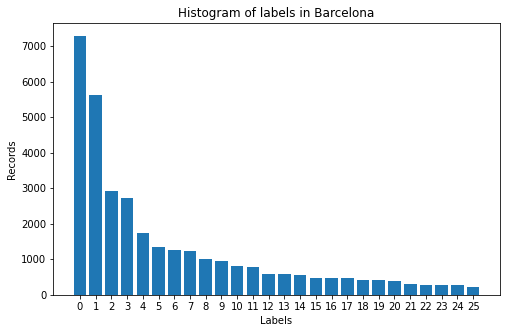

In [29]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
ax.set_xticks(hist_labels_bcn.index)
plt.title('Histogram of labels in Barcelona')
plt.xlabel('Labels')
plt.ylabel('Records')
ax.bar(hist_labels_bcn.index, hist_labels_bcn.Selected_Categories)

We repeat the proccedure for the other cities.

MADRID

<BarContainer object of 25 artists>

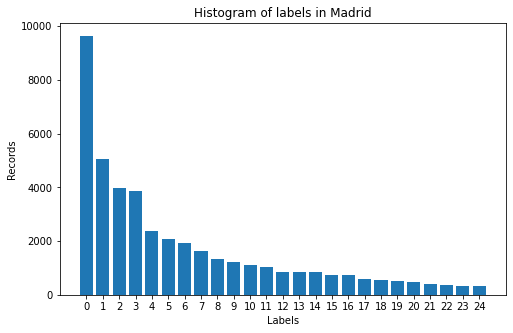

In [30]:
cat_mad_volums_idx = mad_labels_volums[mad_labels_volums.values > 100].index
retail_mad_red = retail_mad[retail_mad['title_cat'].isin(cat_mad_volums_idx)]
retail_mad_red.rename(columns = {'title_cat':'category'}, inplace = True)

retail_mad_red_aux = retail_mad_red.merge(selected_categories, on="category", how="left")
retail_mad_red = retail_mad_red_aux[~retail_mad_red_aux['Selected_Categories'].isna()]

retail_mad_red.to_csv('Data/Datasets/retail_mad_selec_cats.csv', sep = ',', encoding = 'utf-8', index = False)

retail_mad_red['Selected_Categories'].value_counts()

hist_labels_mad = pd.DataFrame(retail_mad_red['Selected_Categories'].value_counts())
hist_labels_mad.reset_index(inplace = True)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
plt.title('Histogram of labels in Madrid')
plt.xlabel('Labels')
plt.ylabel('Records')
ax.set_xticks(hist_labels_mad.index)
ax.bar(hist_labels_mad.index, hist_labels_mad.Selected_Categories)

LONDON

<BarContainer object of 25 artists>

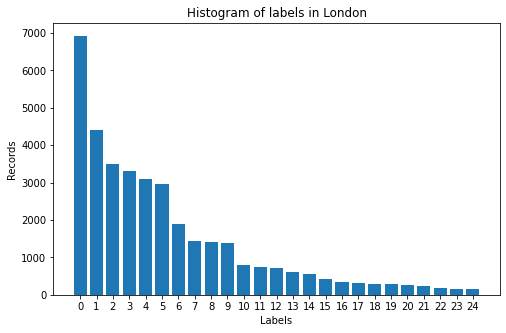

In [31]:
cat_lnd_volums_idx = lnd_labels_volums[lnd_labels_volums.values > 100].index
retail_lnd_red = retail_lnd[retail_lnd['title_cat'].isin(cat_lnd_volums_idx)]
retail_lnd_red.rename(columns = {'title_cat':'category'}, inplace = True)

retail_lnd_red_aux = retail_lnd_red.merge(selected_categories, on="category", how="left")
retail_lnd_red = retail_lnd_red_aux[~retail_lnd_red_aux['Selected_Categories'].isna()]

retail_lnd_red.to_csv('Data/Datasets/retail_lnd_selec_cats.csv', sep = ',', encoding = 'utf-8', index = False)

retail_lnd_red['Selected_Categories'].value_counts()

hist_labels_lnd = pd.DataFrame(retail_lnd_red['Selected_Categories'].value_counts())
hist_labels_lnd.reset_index(inplace = True)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
plt.title('Histogram of labels in London')
plt.xlabel('Labels')
plt.ylabel('Records')
ax.set_xticks(hist_labels_lnd.index)
ax.bar(hist_labels_lnd.index, hist_labels_lnd.Selected_Categories)

NEW YORK CITY

<BarContainer object of 25 artists>

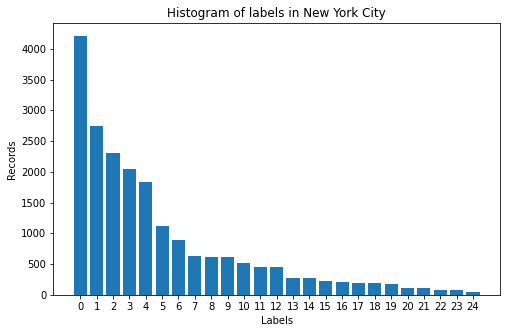

In [32]:
cat_nyc_volums_idx = nyc_labels_volums[nyc_labels_volums.values > 100].index
retail_nyc_red = retail_nyc[retail_lnd['title_cat'].isin(cat_nyc_volums_idx)]
retail_nyc_red.rename(columns = {'title_cat':'category'}, inplace = True)

retail_nyc_red_aux = retail_nyc_red.merge(selected_categories, on="category", how="left")
retail_nyc_red = retail_nyc_red_aux[~retail_nyc_red_aux['Selected_Categories'].isna()]

retail_nyc_red.to_csv('Data/Datasets/retail_nyc_selec_cats.csv', sep = ',', encoding = 'utf-8', index = False)

retail_nyc_red['Selected_Categories'].value_counts()

hist_labels_nyc = pd.DataFrame(retail_nyc_red['Selected_Categories'].value_counts())
hist_labels_nyc.reset_index(inplace = True)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
plt.title('Histogram of labels in New York City')
plt.xlabel('Labels')
plt.ylabel('Records')
ax.set_xticks(hist_labels_nyc.index)
ax.bar(hist_labels_nyc.index, hist_labels_nyc.Selected_Categories)

With this we end the code regarding this section.